In [ ]:
#測試yolo偵測所有球員

import cv2
from ultralytics import YOLO
# 測試影像路徑
test_img_path = 'C:/Users/a3221/deltable_data/yolov8_teamDiff/temp/411.jpg'
# test_img_path = 'C:/Users/a3221/deltable_data/yolov8_teamDiff/dataset/train/images/yt-lMbUn5a2vv0-0138_jpg.rf.3053da7c7b12183226014b3f945165ea.jpg'
                                                                                 
# 加載模型
model_path = 'C:/Users/a3221/deltable_data/yolov8_teamDiff/yolov8_trained2_0719.pt'

model1 = YOLO(model_path)

model1.model.names = {0: 'Ball', 1: 'Hoop', 2: 'Player'}


# 讀取測試影像
img = cv2.imread(test_img_path)

%matplotlib inline
# 或者
# %matplotlib notebook
import matplotlib.pyplot as plt
import cv2

# 執行預測
results = model1.predict(img)

# 可视化结果
annotated_img = results[0].plot()

# 使用 matplotlib 顯示圖片
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 不显示坐标轴
plt.title('Detected Objects')
plt.show()

/opt/anaconda3/envs/yolov8/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/yolov8/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


WARNING ⚠️ 'source' is missing. Using 'source=/opt/anaconda3/envs/yolov8/lib/python3.11/site-packages/ultralytics/assets'.


[ WARN:0@3547.981] global loadsave.cpp:241 findDecoder imread_('/Users/vic/Desktop/YoloV8/test_img/3x3_04.png'): can't open/read file: check file path/integrity



image 1/2 /opt/anaconda3/envs/yolov8/lib/python3.11/site-packages/ultralytics/assets/bus.jpg: 512x384 1 Ball, 2 Hoops, 1 Player, 99.8ms
image 2/2 /opt/anaconda3/envs/yolov8/lib/python3.11/site-packages/ultralytics/assets/zidane.jpg: 288x512 4 Players, 72.9ms
Speed: 1.7ms preprocess, 86.3ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 1 Hoop, 6 Players, 72.2ms
Speed: 2.0ms preprocess, 72.2ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 512)
[0 1 2 3 4 5]
Color Mapping: {0: (255, 0, 0), 1: (0, 0, 255), 2: (255, 0, 0), 3: (0, 0, 255), 4: (255, 0, 0), 5: (0, 0, 255)}


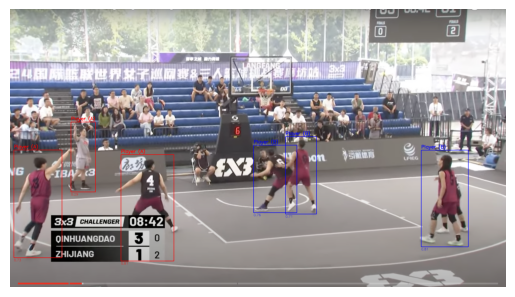

Clustered image saved to /Users/vic/Desktop/YoloV8/detect_img/0.jpg

0: 320x512 1 Ball, 1 Hoop, 3 Players, 90.7ms
Speed: 3.1ms preprocess, 90.7ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 512)
[0 1 2]
Color Mapping: {0: (255, 0, 0), 1: (0, 0, 255), 2: (255, 0, 0)}


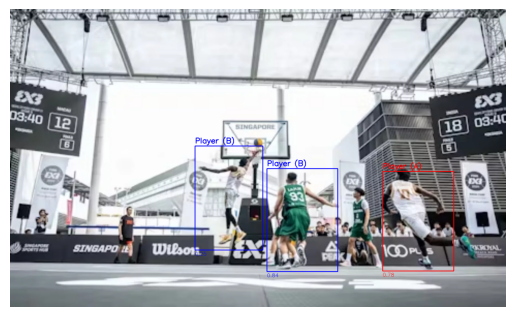

Clustered image saved to /Users/vic/Desktop/YoloV8/detect_img/1.jpg

0: 288x512 1 Hoop, 7 Players, 68.1ms
Speed: 2.4ms preprocess, 68.1ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 512)
[0 1 2 3 4 5 6]
Color Mapping: {0: (255, 0, 0), 1: (0, 0, 255), 2: (255, 0, 0), 3: (0, 0, 255), 4: (255, 0, 0), 5: (0, 0, 255), 6: (255, 0, 0)}


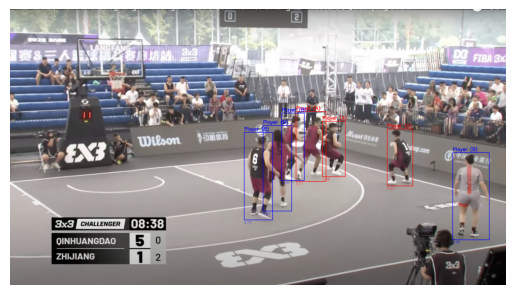

Clustered image saved to /Users/vic/Desktop/YoloV8/detect_img/2.jpg

0: 352x512 1 Ball, 2 Hoops, 3 Players, 88.4ms
Speed: 3.8ms preprocess, 88.4ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 512)
[0 1 2]
Color Mapping: {0: (255, 0, 0), 1: (0, 0, 255), 2: (255, 0, 0)}


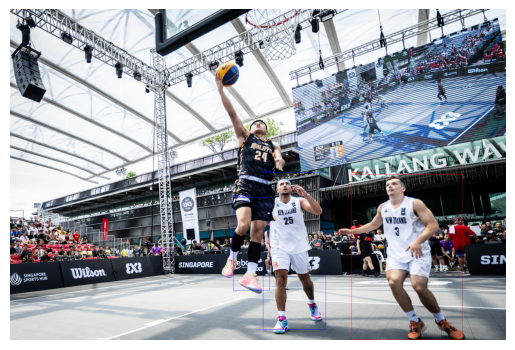

Clustered image saved to /Users/vic/Desktop/YoloV8/detect_img/3.jpg


In [9]:
# 測試圖片
import numpy as np
import cv2
from ultralytics import YOLO
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from sklearn.cluster import DBSCAN
import os
import matplotlib.pyplot as plt

# YOLOv8模型路径
#model_path = 'Desktop/a3221/deltable_data/yolov8_teamDiff/yolov8_trained2_0719.pt'
model_path = '/Users/vic/Desktop/YoloV8/trained-model/yolov8_trained2_0719.pt'

model1 = YOLO(model_path)
model1.model.names = {0: 'Ball', 1: 'Hoop', 2: 'Player'}

# 加载 ResNet 模型
resnet = models.resnet152(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # 移除最后一层全连接层
resnet.eval()

# 定义图像预处理步骤
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def extract_features(image, model, preprocess):
    image_tensor = preprocess(image).unsqueeze(0)
    with torch.no_grad():
        features = model(image_tensor)
    return features.squeeze().numpy()

# 读取图像路径
# test_img_path = 'C:/Users/a3221/deltable_data/yolov8_teamDiff/temp/411.jpg'
#test_img_path = 'C:/Users/a3221/deltable_data/yolov8_teamDiff/dataset/train/images/yt-hOeAbYV1Fw4-0037_jpg.rf.8fec79b80d10087d13ce0cbf8dd4b378.jpg'
test_img_path = '/Users/vic/Desktop/YoloV8/test_img/3x3_04.png'
img = cv2.imread(test_img_path)
results = model1.predict(img)

def process_image(img_path, name):
    img = cv2.imread(img_path)
    results = model1.predict(img)
    
    features_list = []
    for result in results[0].boxes:
        class_id = int(result.cls[0])
        if class_id == 2:  # 仅处理球员
            x1, y1, x2, y2 = map(int, result.xyxy[0])
            cropped_img = img[y1:y2, x1:x2]
            cropped_pil_img = Image.fromarray(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
            features = extract_features(cropped_pil_img, resnet, preprocess)
            features_list.append(features)
    
    n = len(features_list)
    if n < 2:
        print("特徵向量數量不足，無法進行聚類。")
    else:
        features_2d = np.array(features_list)

        # 進行DBSCAN聚類
        dbscan = DBSCAN(eps=0.9, min_samples=1).fit(features_2d)
        labels = dbscan.labels_
        print(labels)
    
        colors = [(255, 0, 0), (0, 0, 255)]  # Red for B队, Blue for A队
        color_mapping = {}
        
        for i, label in enumerate(labels):
            if label not in color_mapping:
                color_mapping[label] = colors[len(color_mapping) % len(colors)]
        
        print("Color Mapping:", color_mapping)
    
        j = 0
        for i, result in enumerate(results[0].boxes):
            if j == n:
                break
            class_id = int(result.cls[0])
            if class_id == 2:
                label = labels[j]
                if label == -1:
                    continue  # 忽略噪點
                
                x1, y1, x2, y2 = map(int, result.xyxy[0])
                score = result.conf[0]
                team_label = '(A)' if color_mapping[label] == colors[1] else '(B)'
                color = color_mapping[label]
    
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                cv2.putText(img, f'Player {team_label}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
                cv2.putText(img, f'{score:.2f}', (x1, y2 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 1)
                j += 1
                
        # 将 BGR 转换为 RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # 使用 matplotlib 显示图片
        plt.imshow(img_rgb)
        plt.axis('off')  # 隐藏坐标轴
        plt.show()
    
        output_img_path = f'/Users/vic/Desktop/YoloV8/detect_img/{name}.jpg'
        cv2.imwrite(output_img_path, img)
        print(f"Clustered image saved to {output_img_path}")

def process_folder(folder_path):
    name = 0
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, file_name)
            process_image(img_path, name)
            name += 1

# 处理指定文件夹
folder_path = '/Users/vic/Desktop/YoloV8/test_img'
process_folder(folder_path)


In [14]:
# 測試影片

import numpy as np
import cv2
from ultralytics import YOLO
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from sklearn.cluster import DBSCAN
import os
import matplotlib.pyplot as plt

# 執行Video detect
# YOLOv8模型路径
model_path = '/Users/vic/Desktop/YoloV8/trained-model/yolov8_trained2_0719.pt'

model1 = YOLO(model_path)
model1.model.names = {0: 'Ball', 1: 'Hoop', 2: 'Player'}

# 加载 ResNet 模型
resnet = models.resnet152(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # 移除最后一层全连接层
resnet.eval()

# 定义图像预处理步骤
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def extract_features(image, model, preprocess):
    image_tensor = preprocess(image).unsqueeze(0)
    with torch.no_grad():
        features = model(image_tensor)
    return features.squeeze().numpy()

def process_frame(frame):
    results = model1.predict(frame)
    
    features_list = []
    for result in results[0].boxes:
        class_id = int(result.cls[0])
        if class_id == 2:  # 仅处理球员
            x1, y1, x2, y2 = map(int, result.xyxy[0])
            cropped_img = frame[y1:y2, x1:x2]
            cropped_pil_img = Image.fromarray(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
            features = extract_features(cropped_pil_img, resnet, preprocess)
            features_list.append(features)
    
    n = len(features_list)
    if n < 2:
        print("特徵向量數量不足，無法進行聚類。")
    else:
        features_2d = np.array(features_list)
        
        # 進行DBSCAN聚類
        dbscan = DBSCAN(eps=0.9, min_samples=1).fit(features_2d)
        labels = dbscan.labels_
    
        colors = [(255, 0, 0), (0, 0, 255)]  # Red for B队, Blue for A队
        color_mapping = {}
        
        for i, label in enumerate(labels):
            if label not in color_mapping:
                color_mapping[label] = colors[len(color_mapping) % len(colors)]
    
        j = 0
        for i, result in enumerate(results[0].boxes):
            if j == n:
                break
            class_id = int(result.cls[0])
            if class_id == 2:
                label = labels[j]
                if label == -1:
                    continue  # 忽略噪點
                
                x1, y1, x2, y2 = map(int, result.xyxy[0])
                score = result.conf[0]
                team_label = '(A)' if color_mapping[label] == colors[1] else '(B)'
                color = color_mapping[label]
    
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                cv2.putText(frame, f'Player {team_label}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
                cv2.putText(frame, f'{score:.2f}', (x1, y2 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 1)
                j += 1
                
        return frame

# 处理视频文件
video_path = '/Users/vic/Desktop/YoloV8/test_video/TheBestPlays-AsiaCup.mp4'
output_video_path = '/Users/vic/Desktop/YoloV8/detect_video/thebest_detected.mp4'

cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Unable to open video file.")
else:
    # 获取视频的基本信息
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # 创建 VideoWriter 对象
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 或者使用 'XVID'、'MJPG' 
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    frame_number = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        processed_frame = process_frame(frame)
        out.write(processed_frame)
        frame_number += 1

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"Processed video saved to {output_video_path}")



0: 288x512 1 Ball, 1 Hoop, 7 Players, 84.4ms
Speed: 4.3ms preprocess, 84.4ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 1 Ball, 1 Hoop, 7 Players, 100.8ms
Speed: 2.3ms preprocess, 100.8ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 1 Ball, 1 Hoop, 6 Players, 72.8ms
Speed: 1.7ms preprocess, 72.8ms inference, 0.6ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 1 Hoop, 6 Players, 71.5ms
Speed: 1.9ms preprocess, 71.5ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 1 Ball, 1 Hoop, 7 Players, 72.0ms
Speed: 1.9ms preprocess, 72.0ms inference, 0.6ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 1 Ball, 1 Hoop, 6 Players, 72.4ms
Speed: 1.9ms preprocess, 72.4ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 512)

0: 288x512 1 Ball, 1 Hoop, 8 Players, 70.9ms
Speed: 2.0ms preprocess, 70.9ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 512)

0: 2